In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters
from ULite import *
from DatasetReader import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './ULite/'

In [2]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 224, 224]) torch.Size([16, 1, 224, 224])


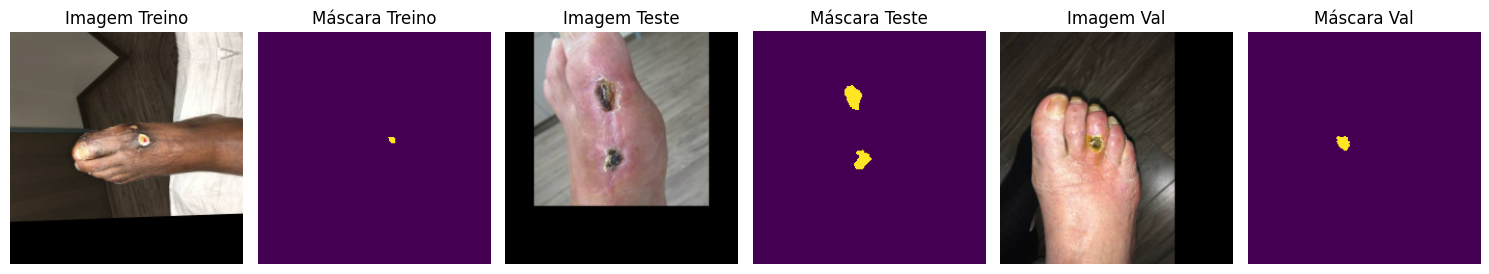

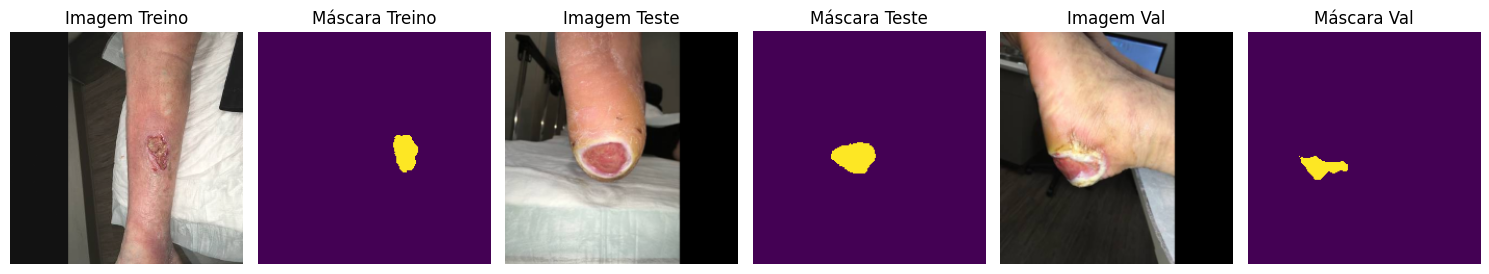

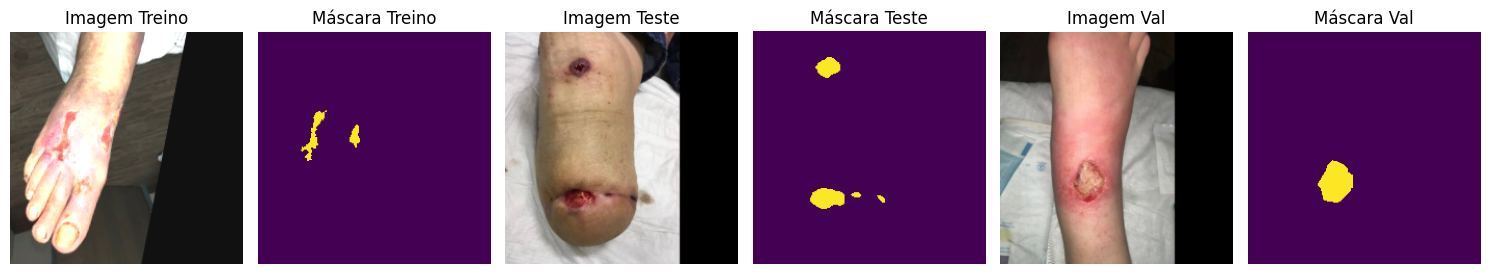

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [8]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = Trainer(model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


In [ ]:
model = ULite(in_channels=in_channels, out_channels=num_classes)
train(model,'ULite-1')

In [ ]:
model = ULite(in_channels=in_channels, out_channels=num_classes)
train(model,'ULite-2')

trainable_parameters: 878417


Parando na época 44 por early stopping. 0.0898 Dice: 0.9218 mIoU: 0.8660 F1: 0.9218 IoU: 0.8527 Precision: 0.9232 Recall: 0.9216 Q: 0.7993 Tempo total: 00:15:29 LR:0.000250

Melhor modelo:
 Epoch [24/300] - Loss: 0.0588 Val Loss: 0.0814 Dice: 0.9275 mIoU: 0.8750 F1: 0.9275 IoU: 0.8592 Precision: 0.9353 Recall: 0.9207 Q: 0.8127 Tempo total: 00:08:28 LR:0.000500
Ultimo modelo:
 Epoch [44/300] - Loss: 0.0348 Val Loss: 0.0898 Dice: 0.9218 mIoU: 0.8660 F1: 0.9218 IoU: 0.8527 Precision: 0.9232 Recall: 0.9216 Q: 0.7993 Tempo total: 00:15:29 LR:0.000250 FPS: 1258.4724986943431
Saved as ./U-Lite-fuseg-VISAPP-2026//ULite-2-epochs300.pth
./U-Lite-fuseg-VISAPP-2026/outputs/sample0-ULite-2-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample1-ULite-2-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample2-ULite-2-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample3-ULite-2-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample4-ULite-2-epochs300.png saved.
FPS: 

In [ ]:
model = ULite(in_channels=in_channels, out_channels=num_classes)
train(model,'ULite-3')

trainable_parameters: 878417
Parando na época 35 por early stopping. 0.0787 Dice: 0.9307 mIoU: 0.8790 F1: 0.9307 IoU: 0.8603 Precision: 0.9332 Recall: 0.9299 Q: 0.8187 Tempo total: 00:12:22 LR:0.000500

Melhor modelo:
 Epoch [15/300] - Loss: 0.0770 Val Loss: 0.0760 Dice: 0.9325 mIoU: 0.8816 F1: 0.9325 IoU: 0.8545 Precision: 0.9301 Recall: 0.9359 Q: 0.8226 Tempo total: 00:05:18 LR:0.001000
Ultimo modelo:
 Epoch [35/300] - Loss: 0.0425 Val Loss: 0.0787 Dice: 0.9307 mIoU: 0.8790 F1: 0.9307 IoU: 0.8603 Precision: 0.9332 Recall: 0.9299 Q: 0.8187 Tempo total: 00:12:22 LR:0.000500 FPS: 1261.5325501961602
Saved as ./U-Lite-fuseg-VISAPP-2026//ULite-3-epochs300.pth
./U-Lite-fuseg-VISAPP-2026/outputs/sample0-ULite-3-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample1-ULite-3-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample2-ULite-3-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample3-ULite-3-epochs300.png saved.
./U-Lite-fuseg-VISAPP-2026/outputs/sample4-ULite